In [16]:
import numpy as np
import matplotlib.pyplot as plt

project = 'newfault'
traindate = '2024-10-01'
testdate = '2024-10-02'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/'
realdata_dir = '/home/sdybing/gnss-picker/data/realdata/summer23/'

# best_thresh = 0.04 # Approximate crossover point in code 2
# best_thresh = 0.03
# best_thresh = 0.05
best_thresh = 0.135

rows_w_eqs = np.load(realdata_dir + 'real_metadata_rembad_rows_w_eqs.npy')
correct_eq_inds = np.load(test_outputs_path + 'real_testing/realtest_data_rows_w_truepos_result_thresh004.npy')
# correct_eq_inds = np.load(test_outputs_path + 'realtest_data_rows_w_truepos_result_thresh003.npy')
# correct_eq_inds = np.load(test_outputs_path + 'realtest_data_rows_w_truepos_result_thresh005.npy')
# correct_eq_inds = np.load(test_outputs_path + 'real_testing/realtest_data_rows_w_truepos_result_thresh0135.npy')

metadata = np.load(test_outputs_path + 'real_testing/realtest_metadata_with_results_pgd_snr_thresh004.npy')
# metadata = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh003.npy')
# metadata = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh005.npy')
# metadata = np.load(test_outputs_path + 'real_testing/realtest_metadata_with_results_pgd_snr_thresh0135.npy')

# 0: station name
# 1: date sample came from
# 2: sample start time
# 3: sample end time
# 4: random n counter
# 5: sample P-wave arrives at (gauss pos)
# 6: earthquake magnitude
# 7: result
# 8: PGD
# 9: SNR N
# 10: SNR E
# 11: SNR Z
# 12: mean SNR

In [17]:
metadata.shape

(994155, 13)

In [18]:
len(correct_eq_inds)

1158

In [19]:
len(rows_w_eqs)

2123

In [20]:
len(metadata)

994155

In [21]:
matching_rows_idxinrwe = [] # Finding the indices where the correct rows match the rows with earthquakes
count = 0

for j in range(len(correct_eq_inds)):
    correct_row = correct_eq_inds[j]
    for i in range(len(rows_w_eqs)):
        row = rows_w_eqs[i]
        if correct_row == row:
            matching_rows_idxinrwe.append(i)
            count += 1

print(count)
print(len(matching_rows_idxinrwe))

incorrect_eq_inds = np.delete(rows_w_eqs, matching_rows_idxinrwe, axis = 0) # Inverse of correct eq inds
print(len(incorrect_eq_inds))

1158
1158
965


In [22]:
# 0: station name
# 1: date sample came from
# 2: sample start time
# 3: sample end time
# 4: random n counter
# 5: sample P-wave arrives at (gauss pos)
# 6: earthquake magnitude
# 7: result
# 8: PGD
# 9: SNR N
# 10: SNR E
# 11: SNR Z
# 12: mean SNR

mags_correct = metadata[:,6][correct_eq_inds].astype(float)
mags_incorrect = metadata[:,6][incorrect_eq_inds].astype(float)

pgds_m_correct = metadata[:,8][correct_eq_inds].astype(float)
pgds_m_incorrect = metadata[:,8][incorrect_eq_inds].astype(float)

snrsn_correct = metadata[:,9][correct_eq_inds].astype(float)
snrsn_incorrect = metadata[:,9][incorrect_eq_inds].astype(float)

snrse_correct = metadata[:,10][correct_eq_inds].astype(float)
snrse_incorrect = metadata[:,10][incorrect_eq_inds].astype(float)

snrsz_correct = metadata[:,11][correct_eq_inds].astype(float)
snrsz_incorrect = metadata[:,11][incorrect_eq_inds].astype(float)

meansnr_correct = metadata[:,12][correct_eq_inds].astype(float)
meansnr_incorrect = metadata[:,12][incorrect_eq_inds].astype(float)

In [23]:
print(len(snrsn_correct))
print(len(snrsn_incorrect))
# print(snrsn_correct)
# print(snrsn_incorrect)

1158
965


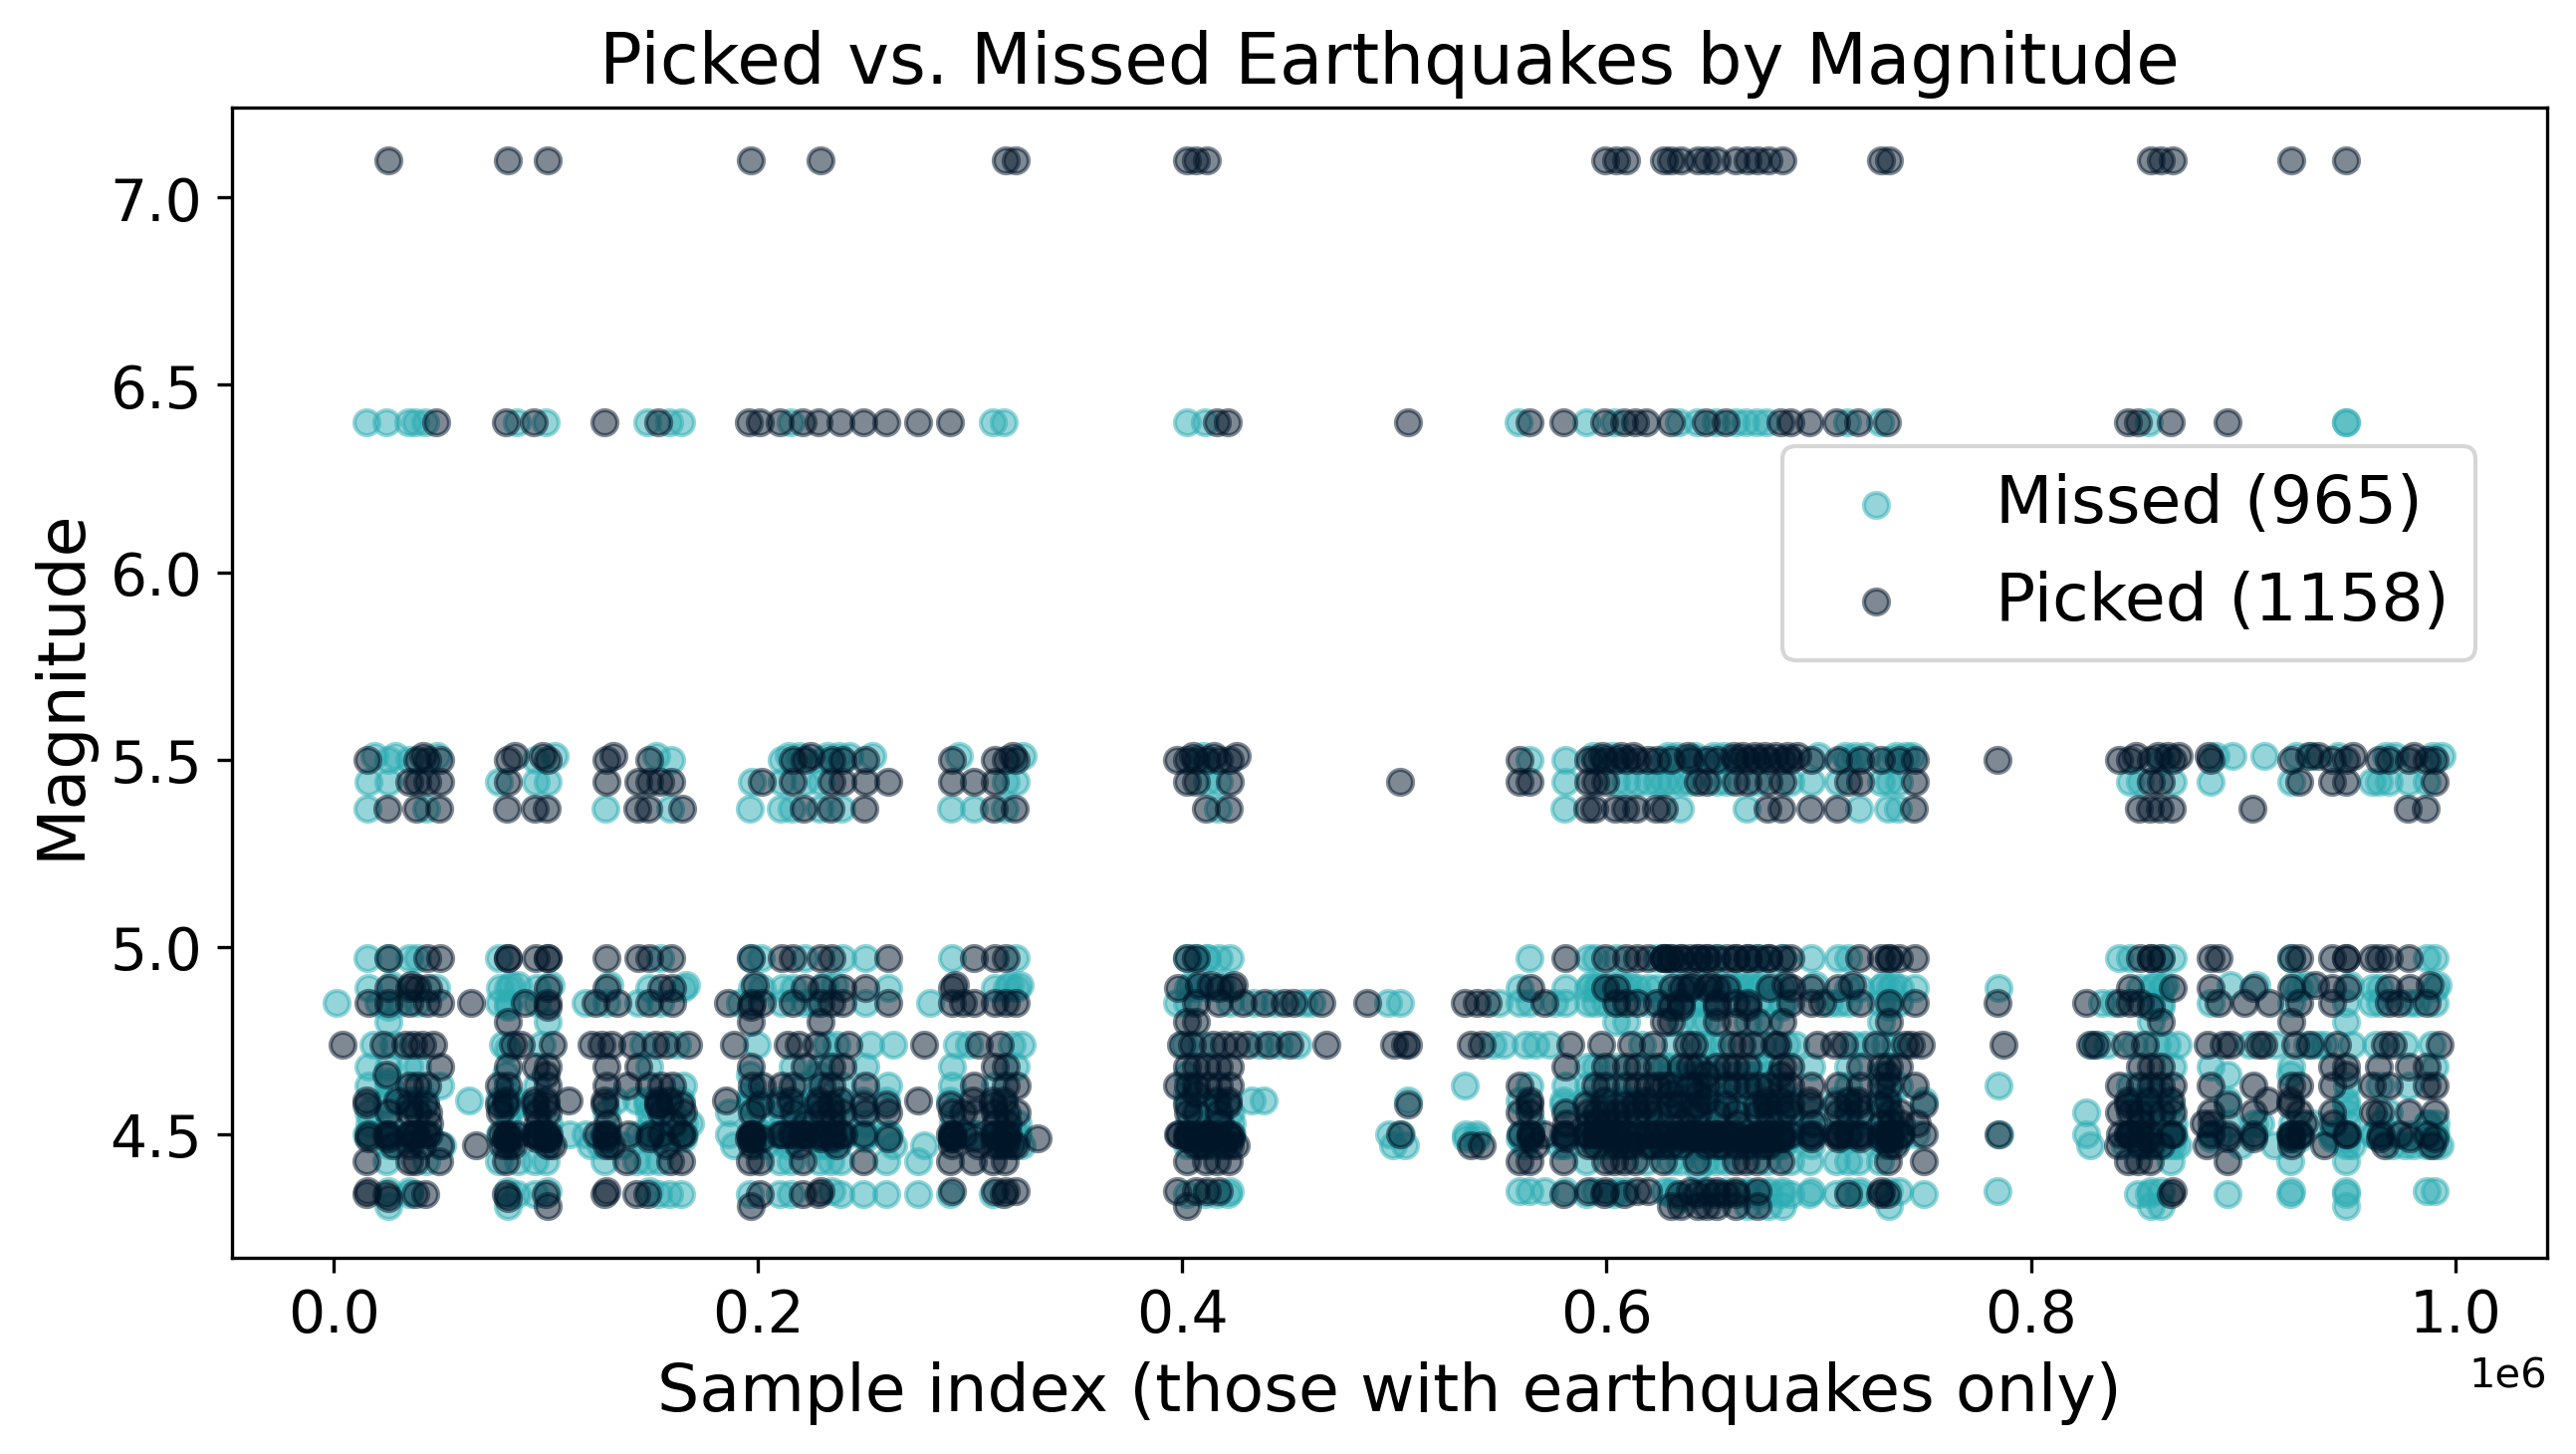

In [24]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, mags_incorrect, label = 'Missed (' + str(len(mags_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, mags_correct, label = 'Picked (' + str(len(mags_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('Magnitude', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Picked vs. Missed Earthquakes by Magnitude', fontsize = 17)
plt.legend(loc = (0.67, 0.52), fontsize = 16)
plt.show();
# plt.savefig(figure_save_dir + '20a_realtestdata_pickmiss_mag_thresh013.png', format = 'PNG')
# plt.close();

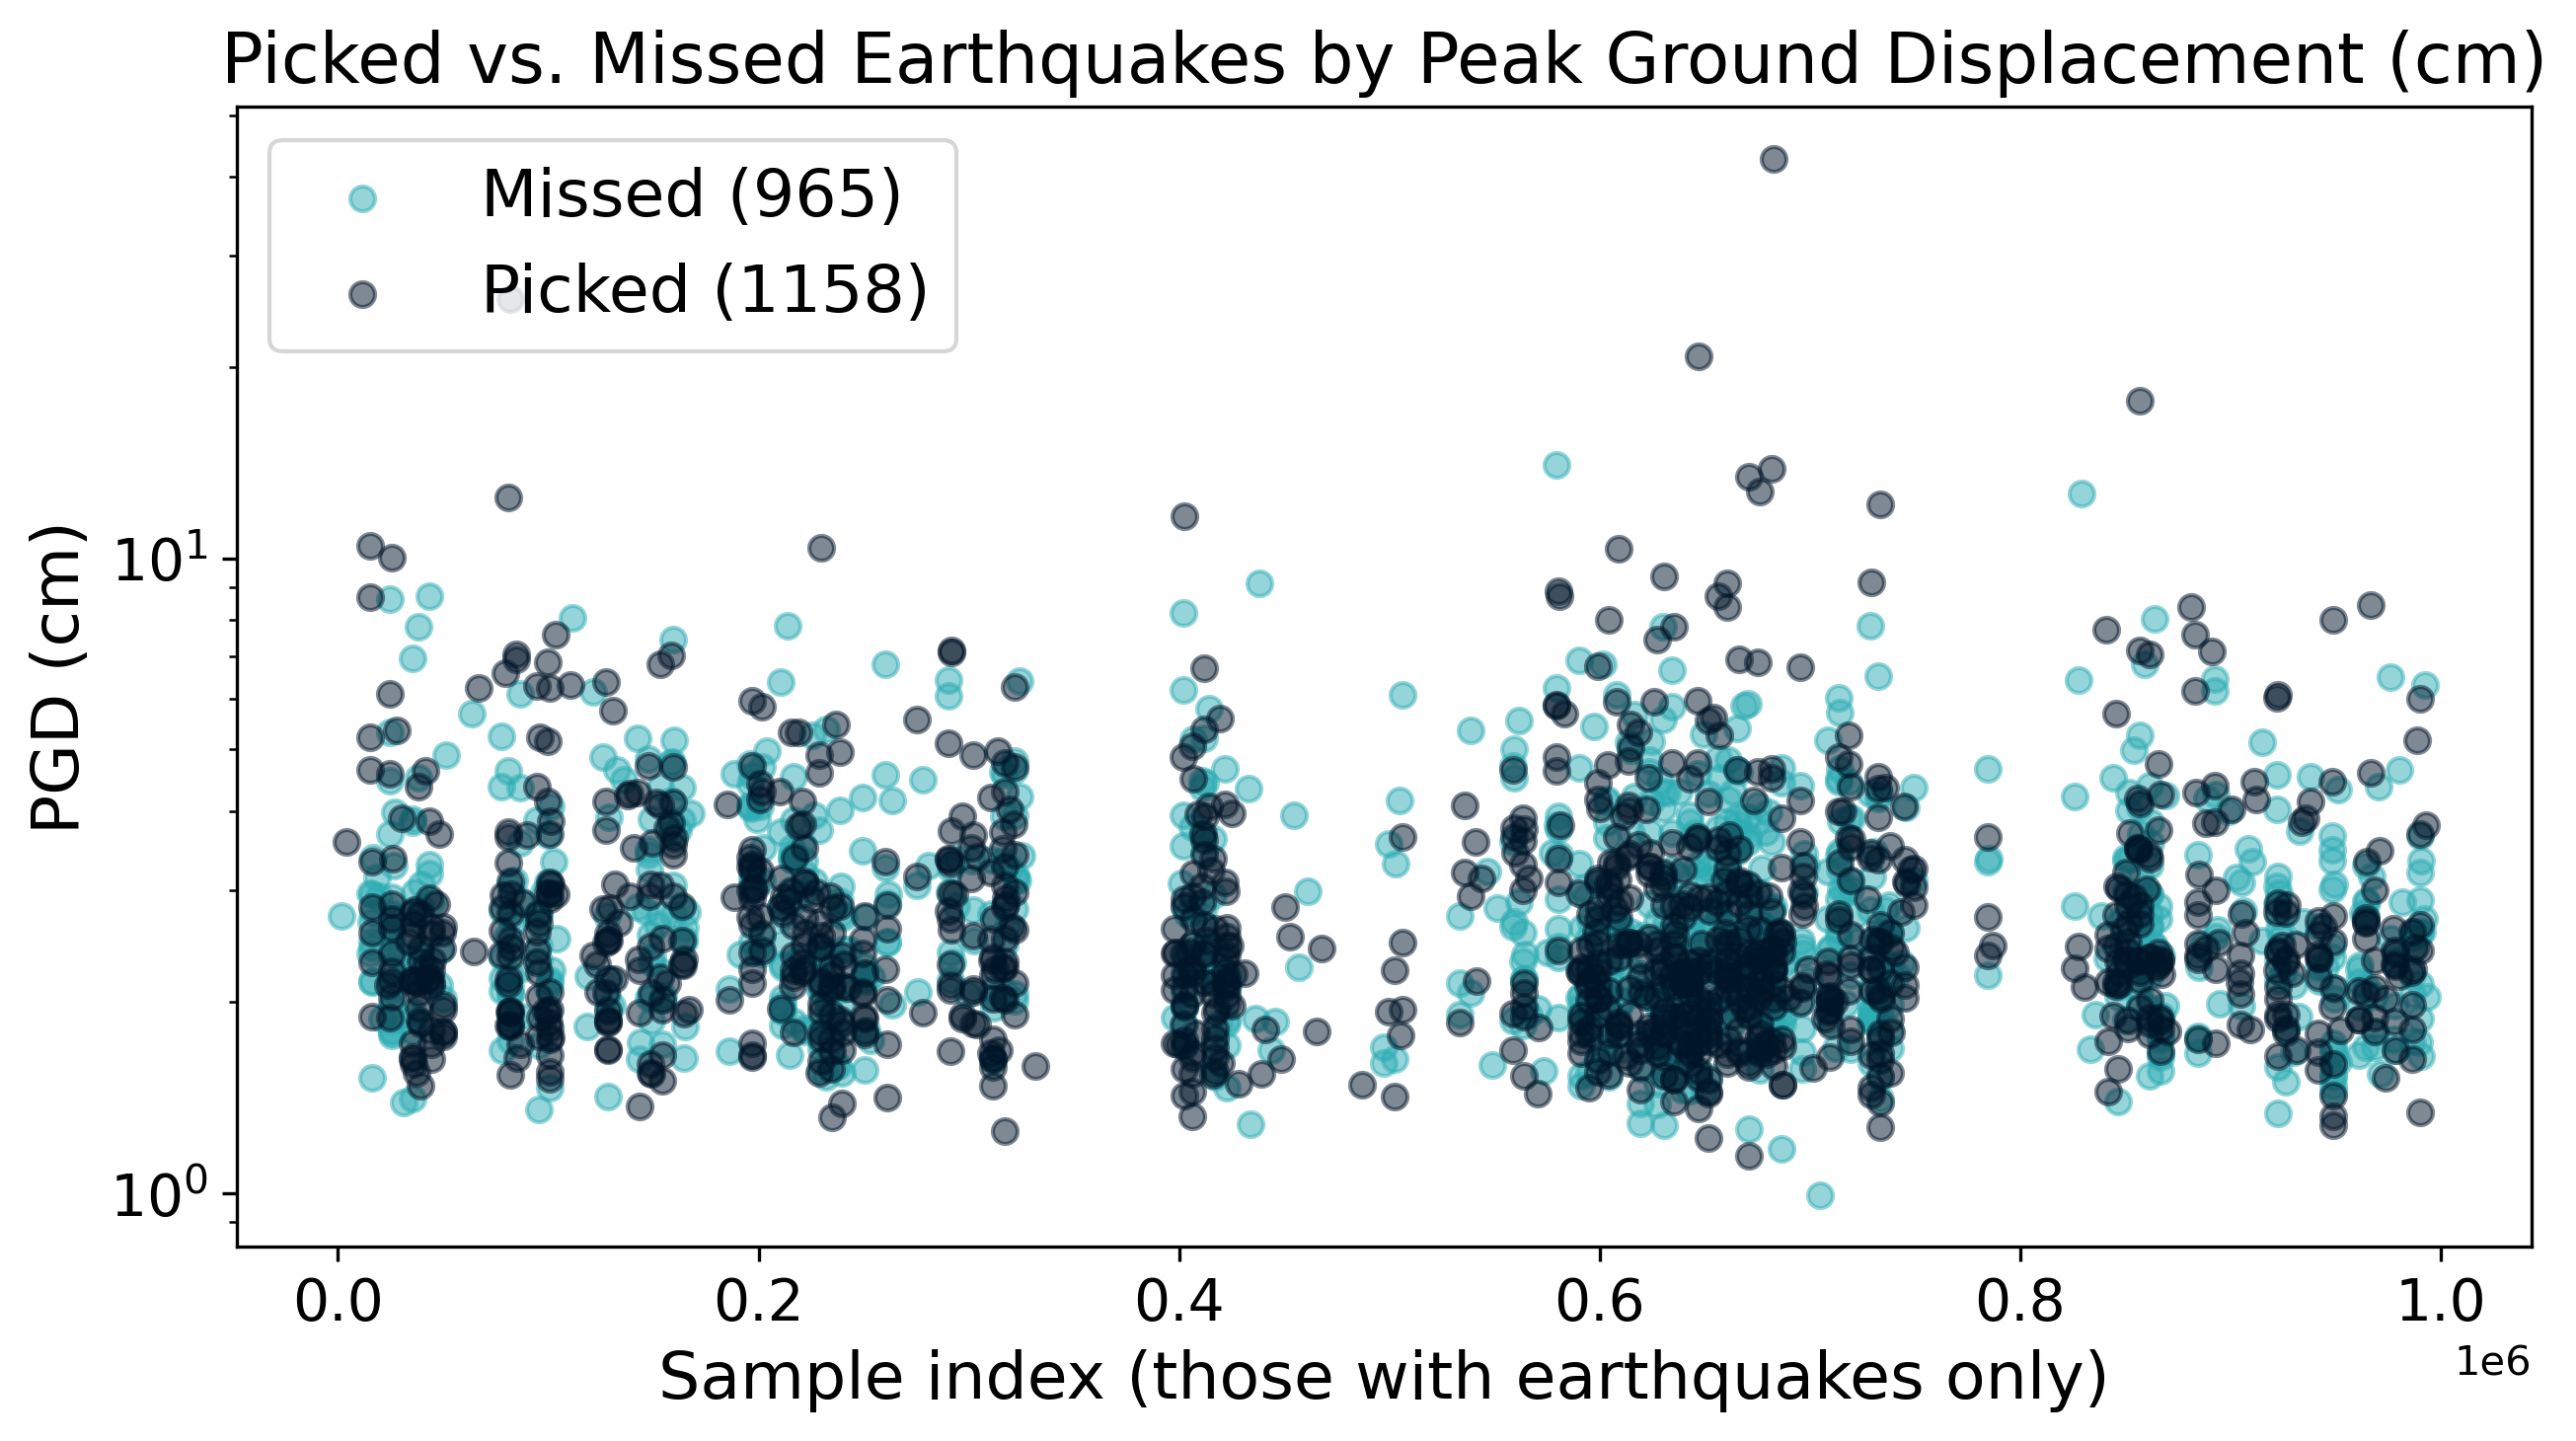

In [25]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, pgds_m_incorrect*100, label = 'Missed (' + str(len(pgds_m_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, pgds_m_correct*100, label = 'Picked (' + str(len(pgds_m_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('PGD (cm)', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.title('Picked vs. Missed Earthquakes by Peak Ground Displacement (cm)', fontsize = 17)
plt.legend(loc = 'upper left', fontsize = 16)
plt.show();
# plt.savefig(figure_save_dir + '20b_realtestdata_pickmiss_pgd_thresh013.png', format = 'PNG')
# plt.close();

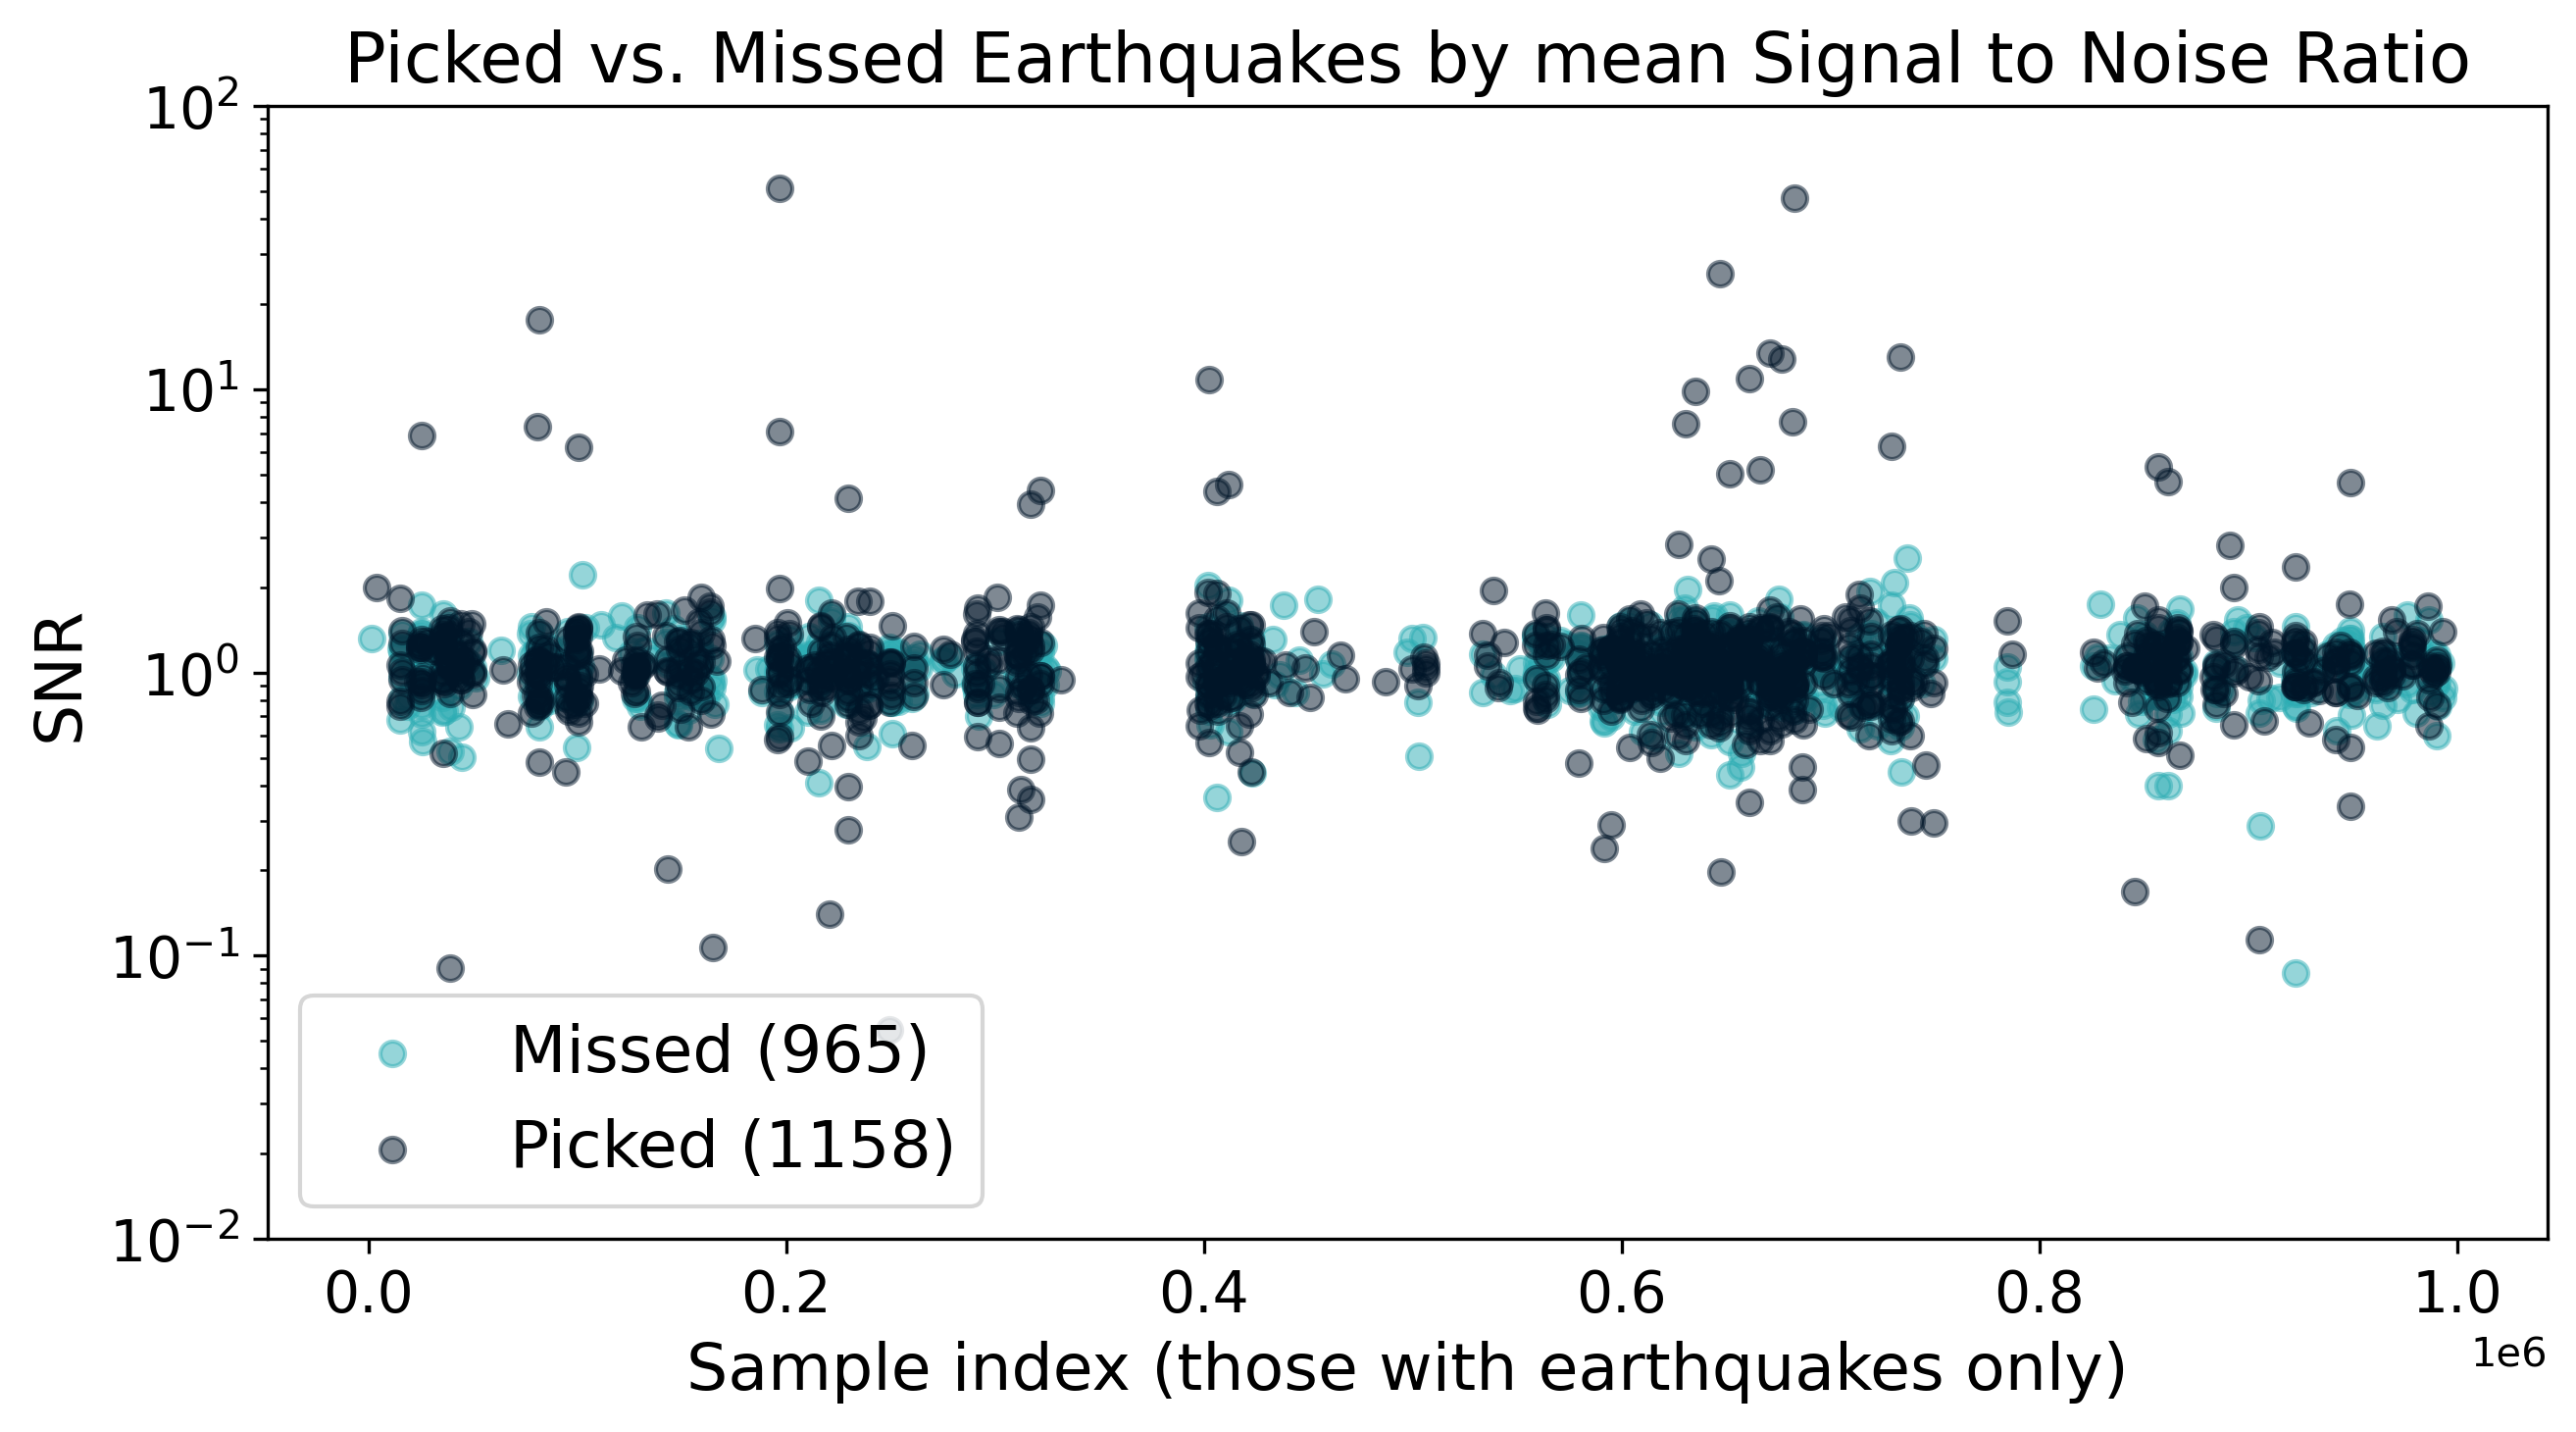

In [26]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, meansnr_incorrect, label = 'Missed (' + str(len(meansnr_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, meansnr_correct, label = 'Picked (' + str(len(meansnr_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by mean Signal to Noise Ratio', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
plt.show();
# plt.savefig(figure_save_dir + '20c_realtestdata_pickmiss_SNRN_thresh013.png', format = 'PNG')
# plt.close();

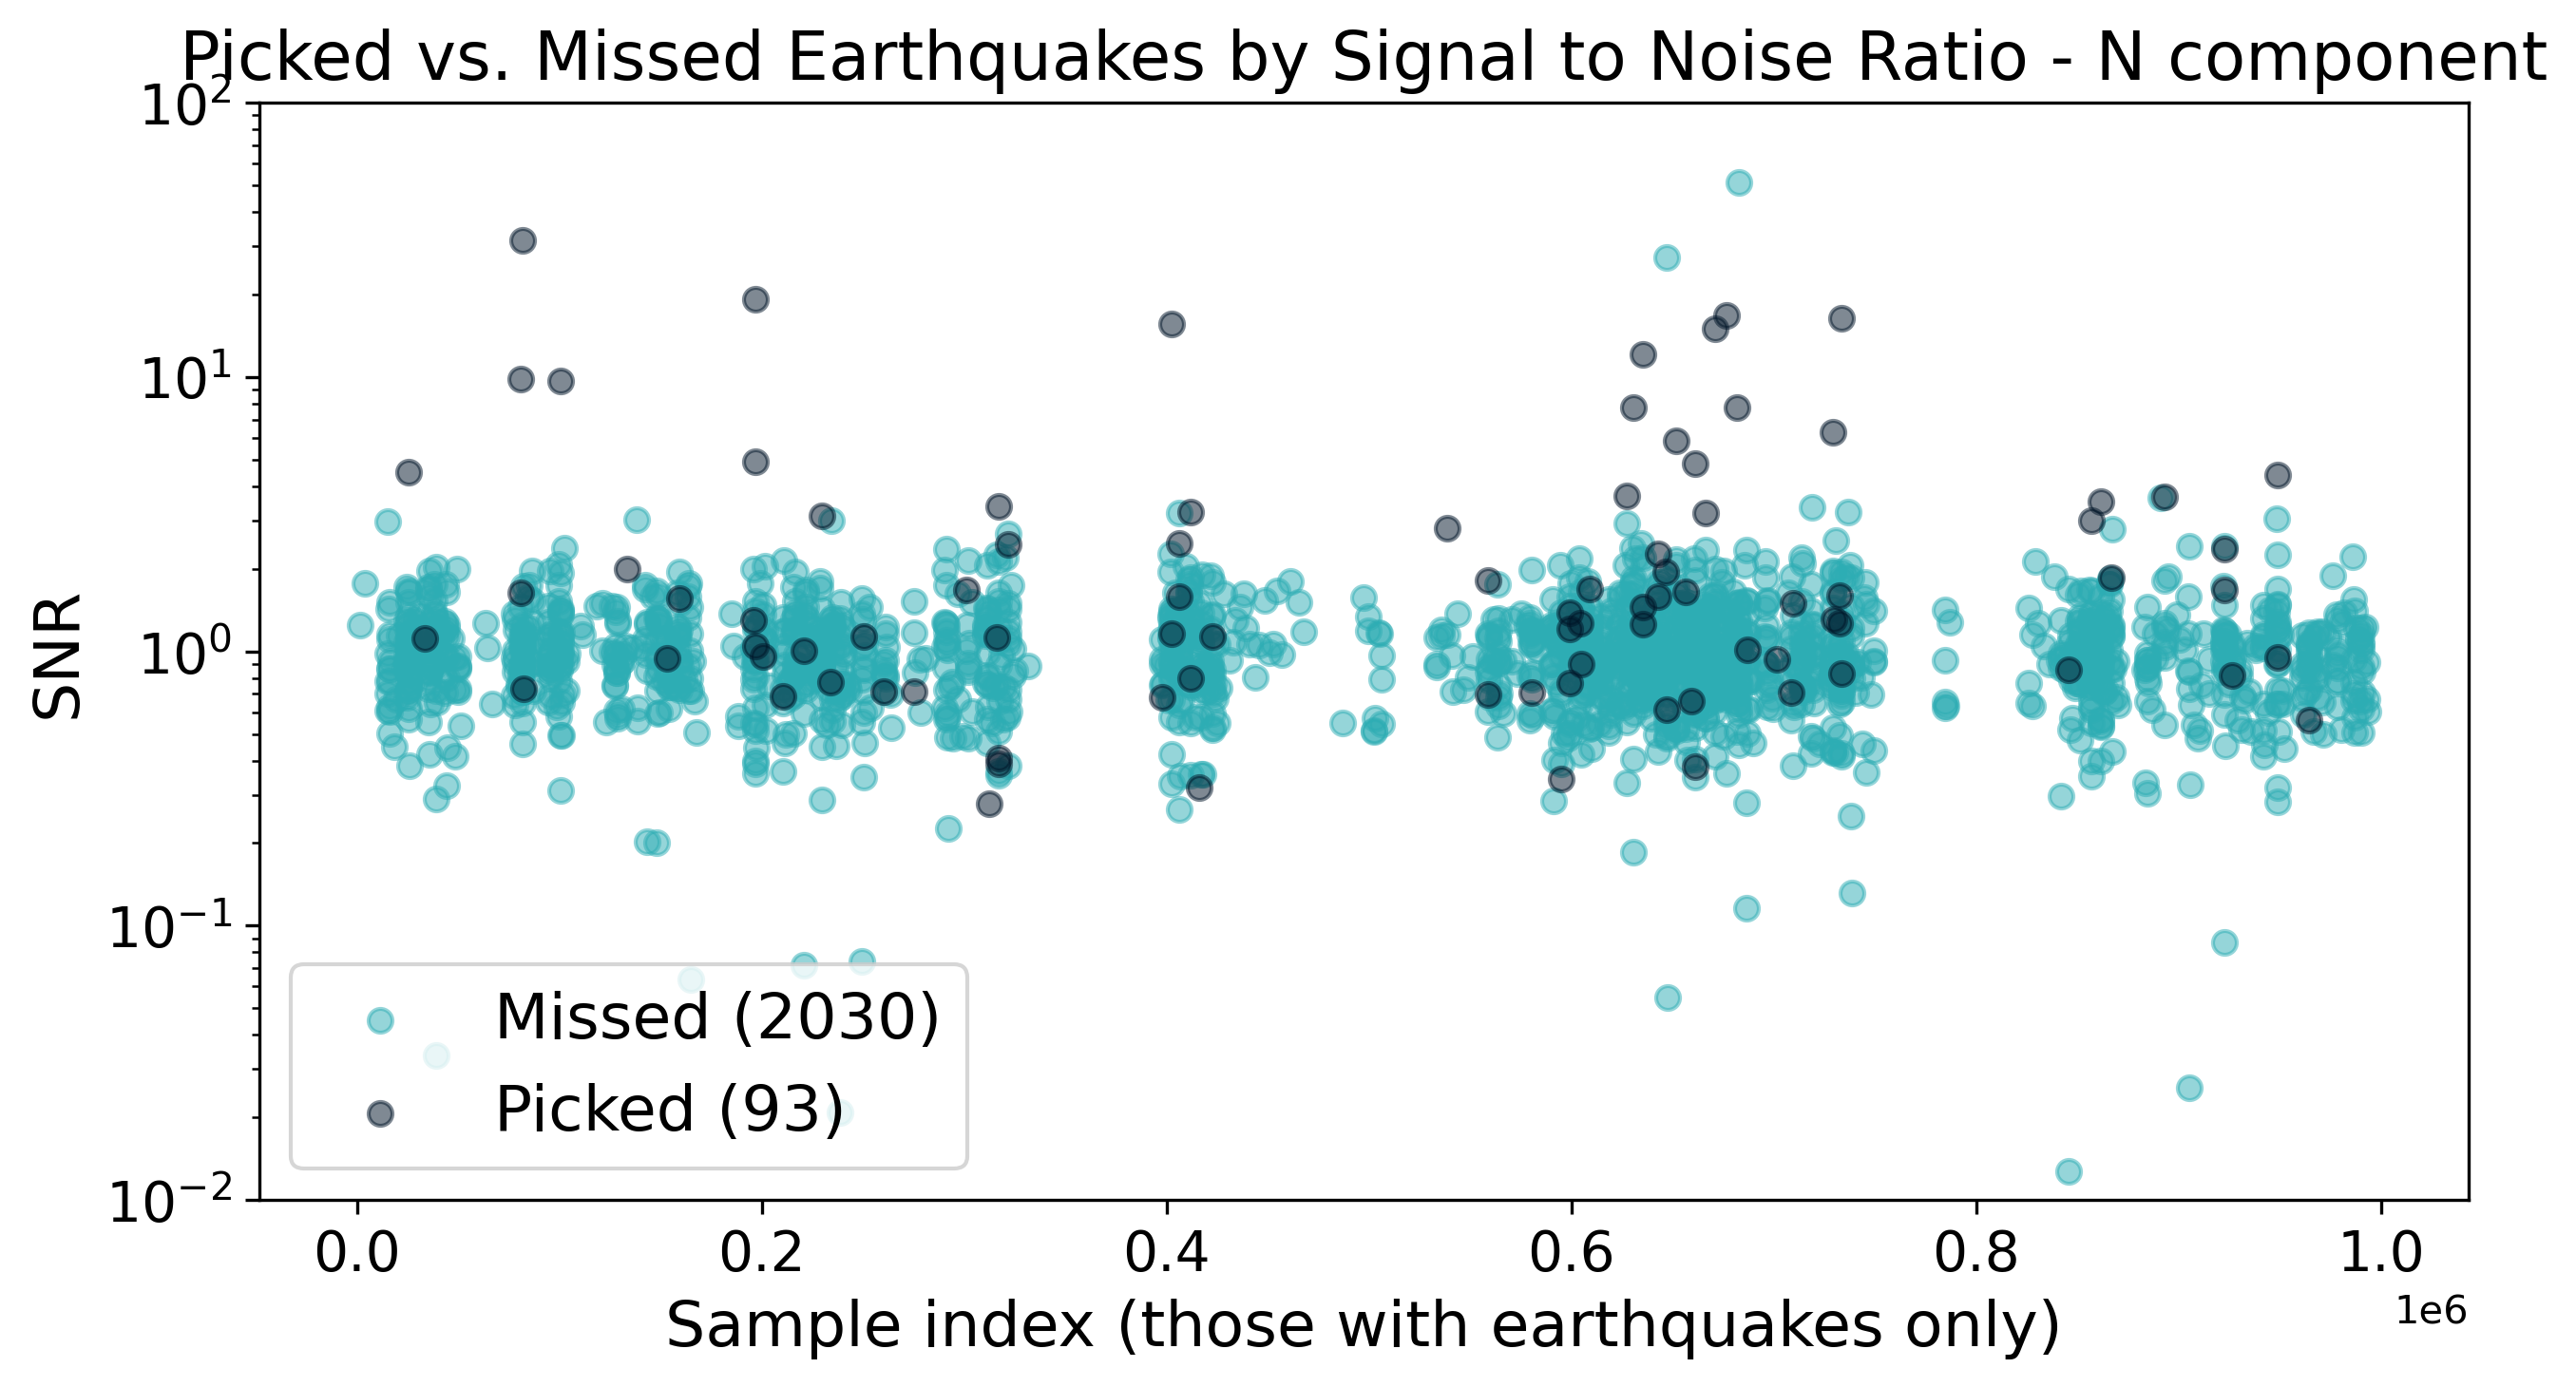

In [10]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, snrsn_incorrect, label = 'Missed (' + str(len(snrsn_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, snrsn_correct, label = 'Picked (' + str(len(snrsn_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by Signal to Noise Ratio - N component', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
# plt.show();
# plt.savefig(figure_save_dir + '20c_realtestdata_pickmiss_SNRN_thresh013.png', format = 'PNG')
# plt.close();

In [11]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, snrse_incorrect, label = 'Missed (' + str(len(snrse_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, snrse_correct, label = 'Picked (' + str(len(snrse_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by Signal to Noise Ratio - E component', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
# plt.show();
plt.savefig(figure_save_dir + '20d_realtestdata_pickmiss_SNRE_thresh013.png', format = 'PNG')
plt.close();

In [12]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, snrsz_incorrect, label = 'Missed (' + str(len(snrsz_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, snrsz_correct, label = 'Picked (' + str(len(snrsz_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by Signal to Noise Ratio - Z component', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
# plt.show();
plt.savefig(figure_save_dir + '20e_realtestdata_pickmiss_SNRZ_thresh013.png', format = 'PNG')
plt.close();